### Task 7.1
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [1]:
#Q1 Download Electrical Grid Stability Simulated Data datasets and print the dimension of the dataset. Apply PCA on the dataset and select first three components except "stabf" (target). Print the dimension of modified dataset and visualise the data using appropriate plotting tools. 
import pandas as pd
local_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\Data_for_UCI_named.csv'
df=pd.read_csv(local_path, comment='#')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [2]:
# Print the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (10000, 14)


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Preprocess data
X = df.drop(columns=['stabf'])
y = df['stabf']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X= scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=3)
X = pca.fit_transform(X)

# Perform zero-mean normalization
#df_normalized = df.drop(columns=['stabf'])  # Exclude the target variable
#df_normalized = (df_normalized - df_normalized.mean()) / df_normalized.std()

# Apply PCA and select the first three components
#pca = PCA(n_components=3)
#X_pca = pca.fit_transform(df_normalized)

# Encode the target variable 'stabf' into numerical labels
#label_encoder = LabelEncoder()
#df['stabf_encoded'] = label_encoder.fit_transform(df['stabf'])

# Print the dimensions of the modified dataset
print("Dimensions of the modified dataset after PCA:", X.shape)

Dimensions of the modified dataset after PCA: (10000, 3)


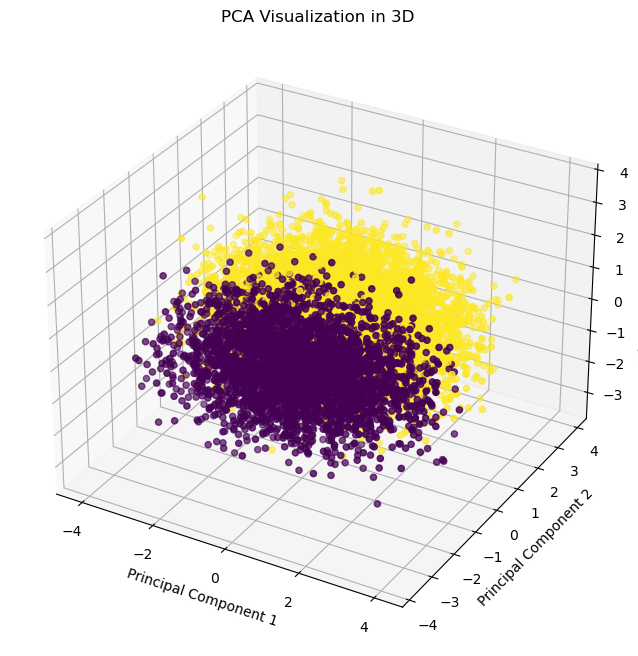

In [4]:
# Visualize the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization in 3D')
plt.show()

In [5]:
# Q2  Classify the "Electrical Grid Stability Simulated Data"  (target=stabf) available in the dataset using SVM with linear kernel.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters.  
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SVM classifier with linear kernel and OneVsRestClassifier for multi-class classification
#svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))#  svm_classifier = SVC(kernel='linear') no need to do OneVsRestClassifier.
svm_classifier = SVC(kernel='linear')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Report performances and model hyperparameters
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Perform cross-validation
scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.2f}")

Performance Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.91
F1-score: 0.91
Confusion Matrix:
[[ 638   86]
 [  72 1204]]
Cross-Validation Scores: [0.9135 0.9225 0.9305 0.9155 0.8995]
Mean Cross-Validation Score: 0.92


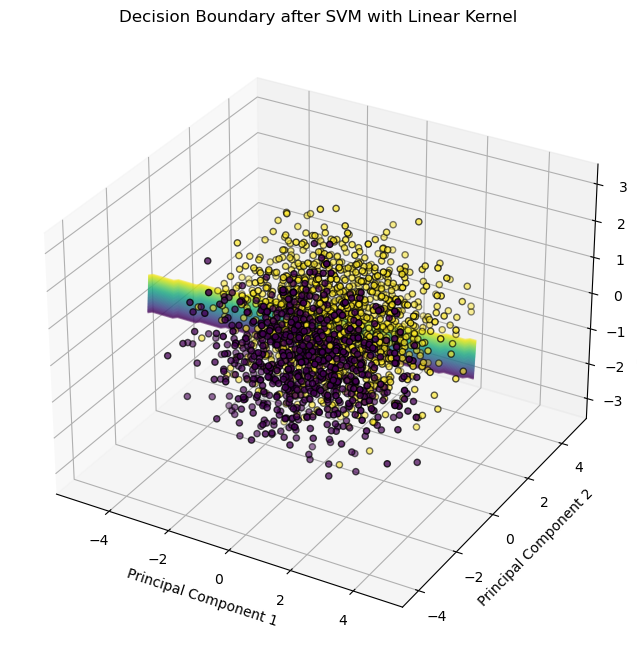

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot decision boundary in 3D
def plot_decision_boundary_3d(X, y, model):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Meshgrid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Use zeros for the third dimension
    Z = Z.reshape(xx.shape)

    # Plot decision surface
    ax.contour3D(xx, yy, Z, 50, cmap='viridis', alpha=0.5)

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k')

    # Set labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Decision Boundary after SVM with Linear Kernel')

    plt.show()

# Plot decision boundary in 3D
plot_decision_boundary_3d(X_test, y_test, svm_classifier)

Based on the provided performance metrics and cross-validation scores, here is the performance summary of the SVM classifier with a linear kernel:

Accuracy: The accuracy of the classifier is 92%, indicating that 92% of the test samples were correctly classified.
Precision: The precision of the classifier is also 92%, which means that among all the samples predicted as positive, 92% of them were actually positive.
Recall: The recall of the classifier is 91%, indicating that the classifier correctly identified 91% of all actual positive samples.
F1-score: The F1-score of the classifier, which is the harmonic mean of precision and recall, is 91%.
Confusion Matrix: The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions. In this case, there are 638 true negatives, 86 false positives, 72 false negatives, and 1204 true positives.
Cross-Validation Scores: The cross-validation scores are [0.9135, 0.9225, 0.9305, 0.9155, 0.8995]. The mean cross-validation score is 0.92, indicating the average accuracy of the model across different validation folds.
Overall, the SVM classifier with a linear kernel performs well with high accuracy, precision, recall, and F1-score. The consistent cross-validation scores further validate the robustness of the model.

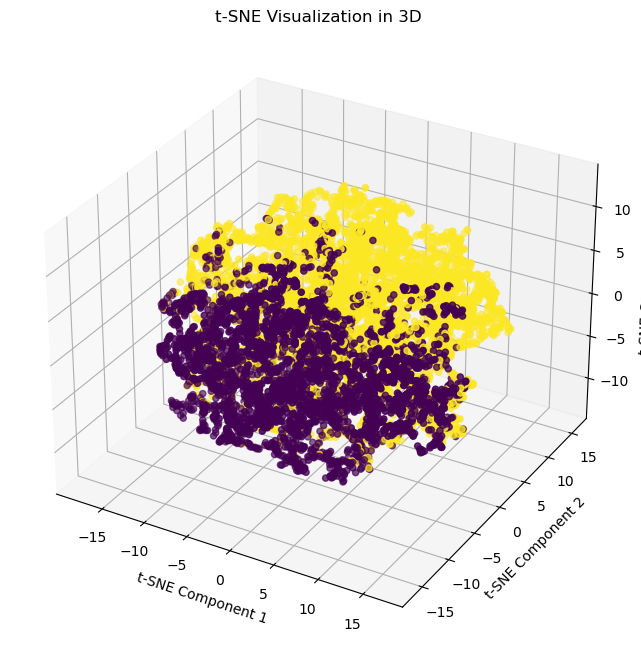

In [9]:
# Q3 Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.
# Apply t-SNE to reduce dimensionality to three components
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the selected components using scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Visualization in 3D')
plt.show()

If the points in the t-SNE plot appear more compact compared to the PCA Visualization plot, it may indicate that t-SNE better preserves the local structure of the data. t-SNE is a nonlinear dimensionality reduction technique that attempts to preserve the local distance relationships between samples during the dimensionality reduction process. Thus, if the data appears more compact in t-SNE, it suggests that t-SNE is better at retaining the local structure of the data, meaning similar samples remain relatively close to each other after dimensionality reduction.

In contrast, PCA is a linear dimensionality reduction technique that aims to maximize the variance of the data during the reduction process. While PCA may perform well in preserving the global structure of the data, it may not capture nonlinear relationships and local structures within the data. Therefore, the result of PCA may lead to data points being less compact in the reduced dimensionality space, even if they are closely clustered in the high-dimensional space.

Overall, if the data points appear more compact in the t-SNE plot, it suggests that t-SNE is more effective in preserving the local structure of the data compared to PCA.

In [14]:
# Q4 Create a model for detecting "Electrical Grid Stability Simulated Data" using SVM with a rbf kernel.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters. 
# Split the dataset into features (X) and target variable (y)
X = X_tsne

y = df['stabf']
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SVM classifier with rbf kernel
model = SVC(kernel='rbf')

# Train the SVM model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Report performances and model hyperparameters
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Performance Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.96
F1-score: 0.94
Confusion Matrix:
[[ 620  104]
 [  57 1219]]
Cross-Validation Scores: [0.905  0.917  0.9295 0.9155 0.9025]
Mean Cross-Validation Score: 0.9138999999999999


Based on the provided performance metrics and cross-validation scores, here is the performance summary of the SVM classifier with an RBF kernel:

Accuracy: The accuracy of the classifier is 92%, indicating that 92% of the test samples were correctly classified.
Precision: The precision of the classifier is 92%, which means that among all the samples predicted as positive, 92% of them were actually positive.
Recall: The recall of the classifier is 96%, indicating that the classifier correctly identified 96% of all actual positive samples.
F1-score: The F1-score of the classifier, which is the harmonic mean of precision and recall, is 94%.
Confusion Matrix: The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions. In this case, there are 620 true negatives, 104 false positives, 57 false negatives, and 1219 true positives.
Cross-Validation Scores: The cross-validation scores are [0.905, 0.917, 0.9295, 0.9155, 0.9025]. The mean cross-validation score is approximately 0.914, indicating the average accuracy of the model across different validation folds.
Overall, the SVM classifier with an RBF kernel performs well with high accuracy, precision, recall, and F1-score. The consistent cross-validation scores further validate the robustness of the model.

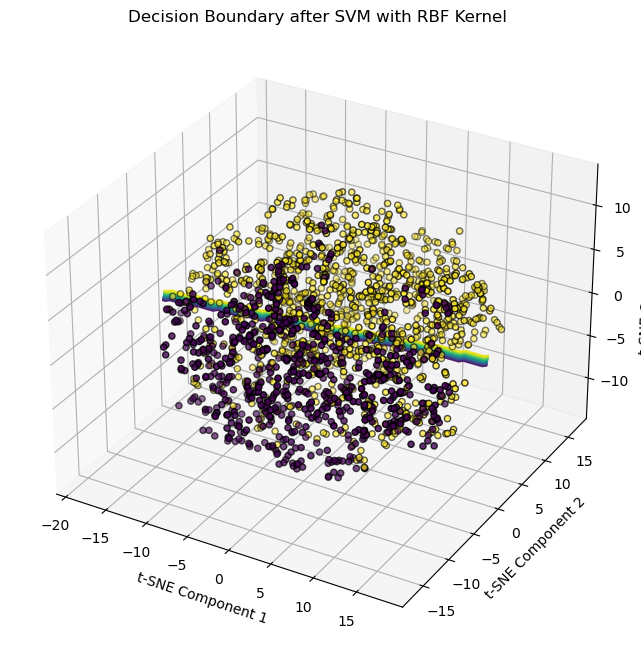

In [12]:
X = X_tsne

y = df['stabf']
y = label_encoder.fit_transform(y)
# Function to plot decision boundary in 3D
def plot_decision_boundary_3d(X, y, model):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Meshgrid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Use zeros for the third dimension
    Z = Z.reshape(xx.shape)

    # Plot decision surface
    ax.contour3D(xx, yy, Z, 50, cmap='viridis', alpha=0.5)

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k')

    # Set labels and title
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title('Decision Boundary after SVM with RBF Kernel')

    plt.show()

# Plot decision boundary in 3D
plot_decision_boundary_3d(X_test, y_test, svm_classifier)

Q5 Based on the model hyper-parameters used in task-2 and task-4, share your understanding of hyper-parameters tuning in ML model development.

Comparing the task 2 and task 4's results of SVM models with linear and RBF kernels:

Linear Kernel Results:
Accuracy: 92%
Precision: 92%
Recall: 91%
F1-score: 91%
Mean Cross-Validation Score: 0.92  

RBF Kernel Results:
Accuracy: 92%
Precision: 92%
Recall: 96%
F1-score: 94%
Mean Cross-Validation Score: 0.914
Both models achieved similar overall accuracy, precision, and F1-score, but the RBF kernel model achieved a higher recall rate, indicating better performance in correctly identifying positive samples. However, it's important to note that the RBF kernel model also produced a slightly higher cross-validation score, suggesting better generalization performance across different folds of the data.

Now, let's discuss hyper-parameter tuning in ML model development based on the model hyper-parameters used in the tasks:

Kernel Type: In SVM, the choice of kernel type (linear, RBF, polynomial, etc.) significantly impacts the model's performance. Hyper-parameter tuning involves selecting the appropriate kernel type based on the dataset's characteristics and problem requirements. For example, if the data is linearly separable, a linear kernel might perform well, while non-linearly separable data may require RBF or polynomial kernels.
Regularization Parameter (C): The regularization parameter (C) controls the trade-off between maximizing the margin and minimizing the classification error. Higher values of C allow for more complex decision boundaries, potentially leading to overfitting, while lower values of C enforce a simpler decision boundary, potentially leading to underfitting. Hyper-parameter tuning involves selecting the optimal value of C through techniques like grid search or randomized search.
Kernel Coefficient (Gamma): For SVM models with RBF kernel, the kernel coefficient (gamma) determines the influence of each training example. Higher values of gamma lead to more complex decision boundaries, potentially resulting in overfitting, while lower values of gamma produce smoother decision boundaries, potentially resulting in underfitting. Hyper-parameter tuning involves selecting the optimal value of gamma through techniques like grid search or randomized search.
Other Parameters: SVM models may have other hyper-parameters depending on the implementation and specific requirements, such as the degree of the polynomial kernel, class weights, etc. These parameters also need to be carefully tuned to achieve optimal model performance.
Overall, hyper-parameter tuning is a critical step in ML model development to optimize the model's performance, ensure generalization across unseen data, and avoid issues like overfitting or underfitting. Techniques like grid search, randomized search, or Bayesian optimization can be used to systematically search the hyper-parameter space and identify the best combination of hyper-parameters for the given dataset and problem.